In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'E:\\creditcard.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Check basic information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check class distribution
print(df['Class'].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
# Separate features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Normalize the "Amount" column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (227845, 30)
Test set size: (56962, 30)


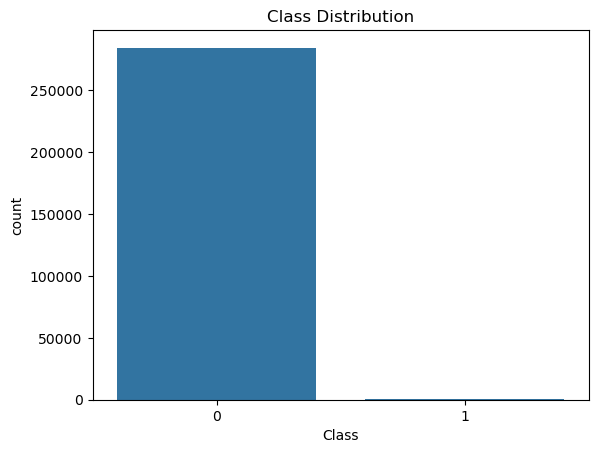

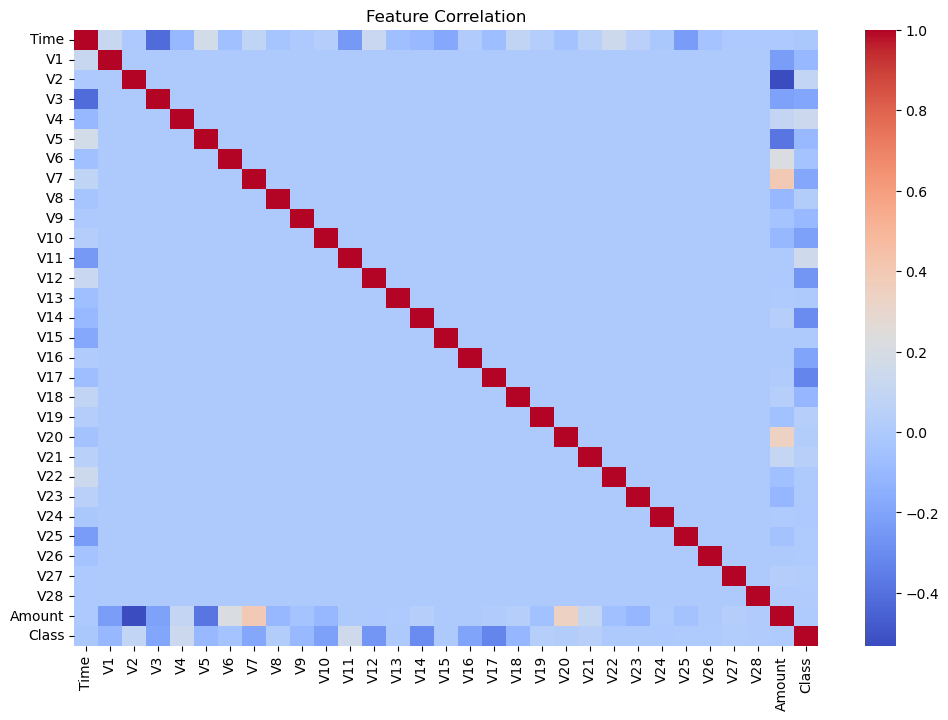

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Initialize models
log_reg = LogisticRegression(solver='liblinear')
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)

# Train models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
mlp.fit(X_train, y_train)

# Predictions
log_reg_preds = log_reg.predict(X_test)
decision_tree_preds = decision_tree.predict(X_test)
mlp_preds = mlp.predict(X_test)


--- Logistic Regression ---
Accuracy: 0.9991222218320986
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.74      0.74        98

    accuracy                           1.00     56962
   macro avg       0.87      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962



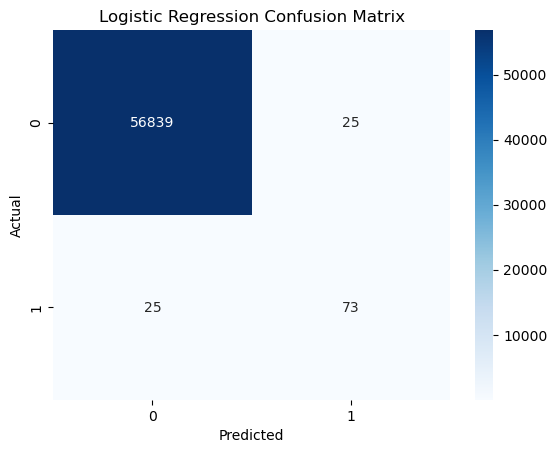

--- Decision Tree ---
Accuracy: 0.9994557775359011
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.78      0.83        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



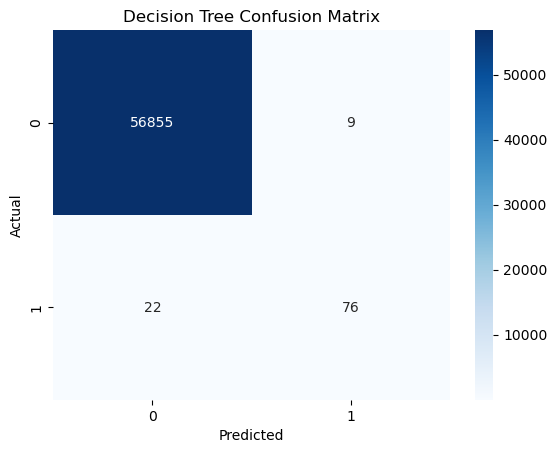

--- Neural Network ---
Accuracy: 0.9983146659176293
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.02      0.04        98

    accuracy                           1.00     56962
   macro avg       1.00      0.51      0.52     56962
weighted avg       1.00      1.00      1.00     56962



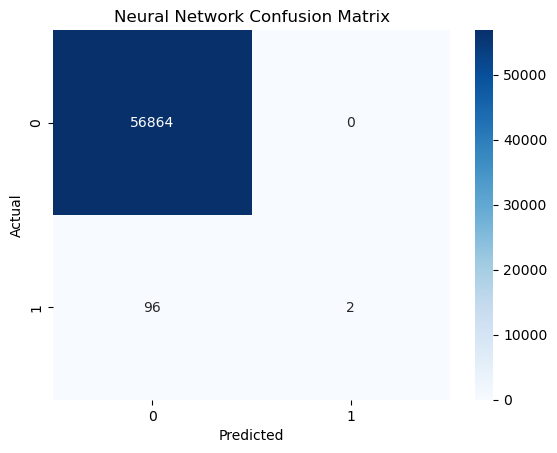

In [9]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate each model
evaluate_model(y_test, log_reg_preds, "Logistic Regression")
evaluate_model(y_test, decision_tree_preds, "Decision Tree")
evaluate_model(y_test, mlp_preds, "Neural Network")


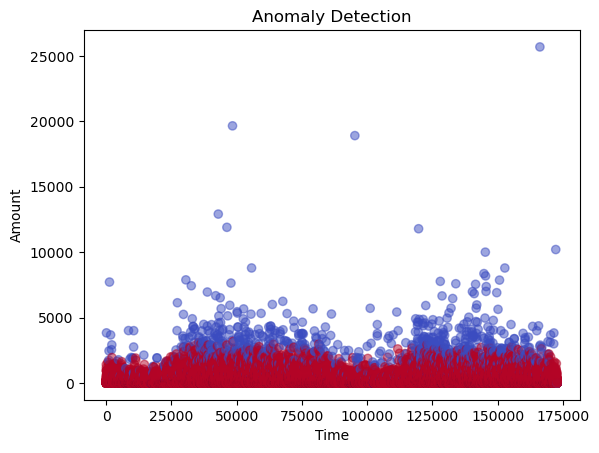

In [10]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
anomalies = iso_forest.fit_predict(X)

# Visualize anomalies
plt.scatter(df['Time'], df['Amount'], c=anomalies, cmap='coolwarm', alpha=0.5)
plt.title('Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()
